<a href="https://colab.research.google.com/github/SwathiMenon/Natural-Language-Processing/blob/main/Mental_Health_Analysis_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AIM:To classify if the person is struggling with mental health issues or not from their messages**

Dataset link:https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus


This Dataet  is a collection of texts related to people with anxiety, depression, and other mental health issues. The corpus consists of two columns: one containing the comments, and the other containing labels indicating whether the comments are considered poisonous or not. The corpus can be used for a variety of purposes, such as sentiment analysis, toxic language detection, and mental health language analysis. The data in the corpus may be useful for researchers, mental health professionals, and others interested in understanding the language and sentiment surrounding mental health issues.1 means considered as a comment which is poisonous with mental health issues, and 0 means not a person who is struggling with mental health issues

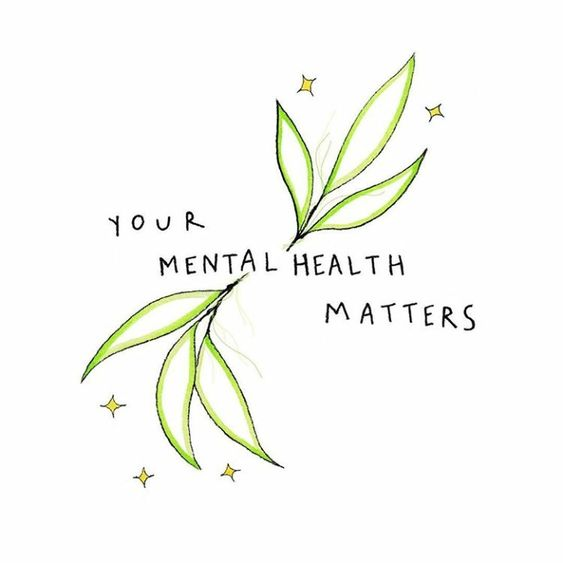

Understanding and detecting mental health issues through text messages can be a critical step in providing timely support and intervention for those in need. Research has shown that linguistic patterns and word choices in written communication can be indicative of various mental health conditions, including depression, anxiety, and stress. Analyzing the content of messages, along with the intensity of emotions conveyed, can offer valuable insights into a person's emotional well-being.

This cutting-edge field of study combines natural language processing (NLP) techniques with psychology and psychiatry, aiming to build automated systems capable of identifying signs of mental distress accurately. By recognizing these signals, friends, family, and mental health professionals can be better equipped to offer timely assistance and support.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [22]:
df=pd.read_csv("/content/drive/MyDrive/datasets/mental_health.csv",encoding="ISO-8859-1")
df


,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


1 means considered as a comment by a person who is struggling with mental health issues, and 0 means not a person who is struggling with mental health issues

In [23]:
df1=df.copy()

**PREPROCESSING**

In [3]:
df.dtypes

text     object
label     int64
dtype: object

In [4]:
df["label"].unique()

array([0, 1])

In [5]:
msg=df.text
msg

0        dear american teens question dutch person hear...
1        nothing look forward lifei dont many reasons k...
2        music recommendations im looking expand playli...
3        im done trying feel betterthe reason im still ...
4        worried  year old girl subject domestic physic...
                               ...                        
27972    posting everyday people stop caring  religion ...
27973    okay definetly need hear guys opinion ive pret...
27974    cant get dog think ill kill myselfthe last thi...
27975    whats point princess bridei really think like ...
27976    got nudes person might might know snapchat do ...
Name: text, Length: 27977, dtype: object

**REMOVING SPECIAL CHARECTERS**

In [6]:
msg=msg.str.replace('[^a-zA-Z0-9]+'," ")
msg

<ipython-input-6-53af49f42db0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  msg=msg.str.replace('[^a-zA-Z0-9]+'," ")


0        dear american teens question dutch person hear...
1        nothing look forward lifei dont many reasons k...
2        music recommendations im looking expand playli...
3        im done trying feel betterthe reason im still ...
4        worried year old girl subject domestic physica...
                               ...                        
27972    posting everyday people stop caring religion m...
27973    okay definetly need hear guys opinion ive pret...
27974    cant get dog think ill kill myselfthe last thi...
27975    whats point princess bridei really think like ...
27976    got nudes person might might know snapchat do ...
Name: text, Length: 27977, dtype: object

**CREATING A WORD CLOUD**

In [7]:
# Assuming 'text_column' is the column in your DataFrame that contains the text data
text_corpus = ' '.join(df['text'].values)

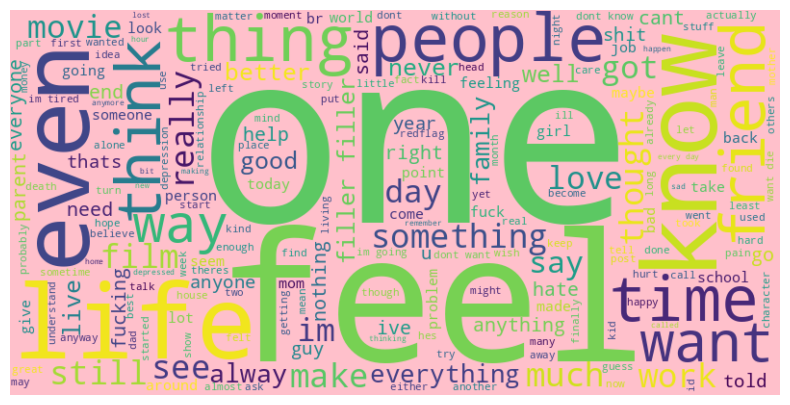

In [8]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='pink').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**STEMMING AND TOKENISING**

In [9]:
import nltk
from nltk.stem import PorterStemmer
nltk.download("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
stemmer=PorterStemmer()
msg=msg.apply(lambda line:[stemmer.stem(token.lower()) for token in word_tokenize(line)]).apply(lambda token:" ".join(token))

In [11]:
msg=msg.apply(lambda line:[token for token in word_tokenize(line) if len(token)>2]).apply(lambda y:" ".join(y))

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

**VECTORIZATION**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
data_vec=tf.fit_transform(msg)
print(data_vec)

  (0, 29361)	0.21988283536809644
  (0, 40085)	0.11541034140805972
  (0, 27592)	0.07086319412141234
  (0, 19414)	0.32471650998367996
  (0, 48061)	0.3724356986067548
  (0, 44226)	0.3364124637124512
  (0, 887)	0.1663252251657869
  (0, 27051)	0.3355707713359065
  (0, 47622)	0.09440619098398989
  (0, 13702)	0.19490929146614272
  (0, 52265)	0.10351565284150314
  (0, 18576)	0.0775959731356527
  (0, 20152)	0.2557466886524221
  (0, 21002)	0.18253765172593853
  (0, 35822)	0.11663849024067588
  (0, 13552)	0.3046434215699263
  (0, 38242)	0.15904470617124172
  (0, 46964)	0.198919889368548
  (0, 1656)	0.2015081835803492
  (0, 11054)	0.247929181907201
  (1, 31816)	0.20055611996229755
  (1, 20515)	0.27097980688502415
  (1, 52036)	0.12562275617052768
  (1, 28907)	0.15213981622366787
  (1, 10864)	0.16056692897859115
  :	:
  (27976, 33344)	0.4316038589925272
  (27976, 43738)	0.21114597297289087
  (27976, 30370)	0.348429119654385
  (27976, 23436)	0.12449964569835625
  (27976, 43734)	0.17898752315638666
  

In [14]:
y=df['label'].values
y

array([0, 1, 0, ..., 1, 1, 0])

**TRAIN TEST SPLIT**

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.3,random_state=1)

**MODEL CREATION**

In [16]:
from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
sv=SVC()
# nb=GaussianNB()
rf=RandomForestClassifier()
ab= AdaBoostClassifier()
models=[sv,rf,ab]
for model in models:
  print(model)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))


SVC()
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4252
           1       0.94      0.89      0.91      4142

    accuracy                           0.92      8394
   macro avg       0.92      0.92      0.92      8394
weighted avg       0.92      0.92      0.92      8394

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4252
           1       0.90      0.88      0.89      4142

    accuracy                           0.90      8394
   macro avg       0.90      0.90      0.90      8394
weighted avg       0.90      0.90      0.90      8394

AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4252
           1       0.91      0.83      0.86      4142

    accuracy                           0.87      8394
   macro avg       0.88      0.87      0.87      8394
weighted avg       0.8

here we are trying this with a comment which should be classified as negative

In [17]:
y_new=model.predict(tf.transform(["im done trying feel betterthe reason "]))
if y_new==1:
    print("positive")
if y_new==0:
    print("negative")


negative


The higest accuracy is in SVC Classifier

# **Artificial Neural Networks**

In [28]:
# Replace NaN values with empty strings (if any)
df1['text'].fillna('', inplace=True)

In [29]:
# Extract text and labels from DataFrame
texts = df1['text'].tolist()
labels = df1['label'].tolist()


In [30]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
vocab_size = len(word_index)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to make them the same length
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

Prepare the labels:

Since ANNs require numeric labels, you need to convert the labels into one-hot encoded vectors.

In [31]:
# Convert labels to one-hot encoded vectors
labels = np.array(labels)
num_classes = len(np.unique(labels))
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size + 1, output_dim=128, input_length=max_sequence_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
epochs = 10
batch_size = 32

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)


Epoch 1/10
630/630 [==============================] - 115s 174ms/step - loss: 0.7297 - accuracy: 0.5042 - val_loss: 0.6820 - val_accuracy: 0.5400
Epoch 2/10
630/630 [==============================] - 52s 82ms/step - loss: 0.3139 - accuracy: 0.8732 - val_loss: 0.2145 - val_accuracy: 0.9205
Epoch 3/10
630/630 [==============================] - 36s 57ms/step - loss: 0.1341 - accuracy: 0.9502 - val_loss: 0.2210 - val_accuracy: 0.9174
Epoch 4/10
630/630 [==============================] - 25s 40ms/step - loss: 0.0739 - accuracy: 0.9750 - val_loss: 0.2522 - val_accuracy: 0.9196
Epoch 5/10
630/630 [==============================] - 22s 35ms/step - loss: 0.0320 - accuracy: 0.9904 - val_loss: 0.3220 - val_accuracy: 0.9156
Epoch 6/10
630/630 [==============================] - 19s 31ms/step - loss: 0.0141 - accuracy: 0.9970 - val_loss: 0.3638 - val_accuracy: 0.9125
Epoch 7/10
630/630 [==============================] - 16s 25ms/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.4035 - val_accurac

In [35]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

175/175 [==============================] - 1s 3ms/step - loss: 0.6044 - accuracy: 0.9055
Test Loss: 0.6044, Test Accuracy: 0.9055
